In [101]:
class CaesarCipher:
    def encrypt(self, text, key):
        result = ""
        for i in text:
            if i.isupper():
                result += chr((ord(i) + key - ord('A')) % 26 + ord('A'))
            elif i.islower():
                result += chr((ord(i) + key - ord('a')) % 26 + ord('a'))
            else:
                result += i
        return result

    def decrypt(self, text, key):
        result = ""
        for i in text:
            if i.isupper():
                result += chr((ord(i) - key - ord('A')) % 26 + ord('A'))
            elif i.islower():
                result += chr((ord(i) - key - ord('a')) % 26 + ord('a'))
            else:
                result += i
        return result


text = "Hello"
key = 6
cipher = CaesarCipher()
ciphertext = cipher.encrypt(text, key)
print(ciphertext)
print(cipher.decrypt(ciphertext, key))



Nkrru
Hello


In [102]:
text = "For you, I would steal stars from the night sky and place them in your heart, so you would never be afraid of the dark."
key = 7
cipher = CaesarCipher()
ciphertext = cipher.encrypt(text, key)
print(ciphertext)
print("--------------------------------")

for key in range(1, 26):
    print(key, cipher.decrypt(ciphertext[0:10], key))

Mvy fvb, P dvbsk zalhs zahyz myvt aol upnoa zrf huk wshjl aolt pu fvby olhya, zv fvb dvbsk ulcly il hmyhpk vm aol khyr.
--------------------------------
1 Lux eua, O
2 Ktw dtz, N
3 Jsv csy, M
4 Iru brx, L
5 Hqt aqw, K
6 Gps zpv, J
7 For you, I
8 Enq xnt, H
9 Dmp wms, G
10 Clo vlr, F
11 Bkn ukq, E
12 Ajm tjp, D
13 Zil sio, C
14 Yhk rhn, B
15 Xgj qgm, A
16 Wfi pfl, Z
17 Veh oek, Y
18 Udg ndj, X
19 Tcf mci, W
20 Sbe lbh, V
21 Rad kag, U
22 Qzc jzf, T
23 Pyb iye, S
24 Oxa hxd, R
25 Nwz gwc, Q


In [103]:
print(cipher.decrypt(ciphertext, 7))


For you, I would steal stars from the night sky and place them in your heart, so you would never be afraid of the dark.


In [104]:
class MyCipher:
    def __init__(self):
        # 替换表
        self.substitution_map = {
            'A': '月', 'B': '日', 'C': 'Я', 'D': '水', 'E': 'Э', 
            'F': '金', 'G': 'Г', 'H': 'あ', 'I': 'И', 'J': 'Δ',
            'K': 'き', 'L': 'Л', 'M': 'こ', 'N': 'ま', 'O': 'Θ',
            'P': 'Π', 'Q': '火', 'R': 'Б', 'S': 'へ', 'T': 'Ф',
            'U': 'Ω', 'V': 'Д', 'W': 'Ш', 'X': 'Ξ', 'Y': 'Ψ',
            'Z': 'Ж'
        }
        # 创建反向映射用于解密
        self.reverse_map = {v: k for k, v in self.substitution_map.items()}

    def encrypt(self, text, key=None):  # key参数保留但不使用
        result = ""
        for char in text:
            if char.upper() in self.substitution_map:
                # 如果是大写字母，直接替换
                if char.isupper():
                    result += self.substitution_map[char]
                # 如果是小写字母，先转大写替换后再转小写
                else:
                    result += self.substitution_map[char.upper()]
            else:
                # 非字母字符保持不变
                result += char
        return result

    def decrypt(self, text, key=None):  # key参数保留但不使用
        result = ""
        i = 0
        while i < len(text):
            found = False
            # 尝试匹配最长的可能替换字符
            for length in [2, 1]:  # 考虑到替换字符可能是1个或2个字符
                if i + length <= len(text):
                    substr = text[i:i+length]
                    if substr in self.reverse_map:
                        result += self.reverse_map[substr]
                        i += length
                        found = True
                        break
            if not found:
                # 如果没有匹配到替换字符，保持原字符
                result += text[i]
                i += 1
        return result
    
cipher = MyCipher()

# 测试加密
text = "HELLO WORLD"
encrypted = cipher.encrypt(text)
print(f"加密后: {encrypted}") 

# 测试解密
decrypted = cipher.decrypt(encrypted)
print(f"解密后: {decrypted}")  

加密后: あЭЛЛΘ ШΘБЛ水
解密后: HELLO WORLD


In [105]:
text="""
My Dearest Elizabeth,

As I sit here beneath the starlit sky, my thoughts inevitably drift to you, as they always do when the world grows quiet and the evening breeze carries the sweet scent of jasmine. Each star above reminds me of the sparkle in your eyes when you laugh, and the moon's gentle glow pales in comparison to your radiant smile.

Since that fateful autumn day when we first met in the old bookshop, my world has been transformed. I remember how you reached for that worn copy of Pride and Prejudice just as I did, our hands briefly touching, and how we spent the next three hours discussing literature over coffee. Your passion for words, your brilliant mind, and your kind heart have captivated me completely.

Every moment we spend together feels like a precious gift. The way you scrunch your nose when you're deep in thought, how you always remember to feed the stray cats in the park, and your infectious laughter that can brighten even the gloomiest of days - these little things make my heart swell with affection.

I find myself collecting small moments throughout my day that I want to share with you - a funny conversation overheard on the train, a beautiful sunset that reminded me of your watercolor paintings, or simply a random thought that made me smile. You have become my first thought in the morning and my last thought before sleep claims me each night.

Tomorrow evening, I would love to take you somewhere special. There's a hidden garden near the old cathedral that comes alive with thousands of fireflies at dusk. Would you do me the honor of watching this magical display with me? We could bring a picnic basket, some of that strawberry wine you love, and create another beautiful memory together.

If you're willing to join me on this little adventure, meet me at our favorite coffee shop at seven o'clock tomorrow evening. I'll be waiting with a single red rose and my heart full of hope.

Forever yours,
William

P.S. - Wear that blue dress you love - the one that makes you look like you've stepped out of a fairy tale.
"""

encrypted = cipher.encrypt(text)
print(encrypted) 



こΨ 水Э月БЭへФ ЭЛИЖ月日ЭФあ,

月へ И へИФ あЭБЭ 日ЭまЭ月Фあ ФあЭ へФ月БЛИФ へきΨ, こΨ ФあΘΩГあФへ ИまЭДИФ月日ЛΨ 水БИ金Ф ФΘ ΨΘΩ, 月へ ФあЭΨ 月ЛШ月Ψへ 水Θ ШあЭま ФあЭ ШΘБЛ水 ГБΘШへ 火ΩИЭФ 月ま水 ФあЭ ЭДЭまИまГ 日БЭЭЖЭ Я月ББИЭへ ФあЭ へШЭЭФ へЯЭまФ Θ金 Δ月へこИまЭ. Э月Яあ へФ月Б 月日ΘДЭ БЭこИま水へ こЭ Θ金 ФあЭ へΠ月БきЛЭ Иま ΨΘΩБ ЭΨЭへ ШあЭま ΨΘΩ Л月ΩГあ, 月ま水 ФあЭ こΘΘま'へ ГЭまФЛЭ ГЛΘШ Π月ЛЭへ Иま ЯΘこΠ月БИへΘま ФΘ ΨΘΩБ Б月水И月まФ へこИЛЭ.

へИまЯЭ Фあ月Ф 金月ФЭ金ΩЛ 月ΩФΩこま 水月Ψ ШあЭま ШЭ 金ИБへФ こЭФ Иま ФあЭ ΘЛ水 日ΘΘきへあΘΠ, こΨ ШΘБЛ水 あ月へ 日ЭЭま ФБ月まへ金ΘБこЭ水. И БЭこЭこ日ЭБ あΘШ ΨΘΩ БЭ月ЯあЭ水 金ΘБ Фあ月Ф ШΘБま ЯΘΠΨ Θ金 ΠБИ水Э 月ま水 ΠБЭΔΩ水ИЯЭ ΔΩへФ 月へ И 水И水, ΘΩБ あ月ま水へ 日БИЭ金ЛΨ ФΘΩЯあИまГ, 月ま水 あΘШ ШЭ へΠЭまФ ФあЭ まЭΞФ ФあБЭЭ あΘΩБへ 水ИへЯΩへへИまГ ЛИФЭБ月ФΩБЭ ΘДЭБ ЯΘ金金ЭЭ. ΨΘΩБ Π月へへИΘま 金ΘБ ШΘБ水へ, ΨΘΩБ 日БИЛЛИ月まФ こИま水, 月ま水 ΨΘΩБ きИま水 あЭ月БФ あ月ДЭ Я月ΠФИД月ФЭ水 こЭ ЯΘこΠЛЭФЭЛΨ.

ЭДЭБΨ こΘこЭまФ ШЭ へΠЭま水 ФΘГЭФあЭБ 金ЭЭЛへ ЛИきЭ 月 ΠБЭЯИΘΩへ ГИ金Ф. ФあЭ Ш月Ψ ΨΘΩ へЯБΩまЯあ ΨΘΩБ まΘへЭ ШあЭま ΨΘΩ'БЭ 水ЭЭΠ Иま ФあΘΩГあФ, あΘШ ΨΘΩ 月ЛШ月Ψへ БЭこЭこ日ЭБ ФΘ 金ЭЭ水 ФあЭ へФБ月Ψ Я月Фへ Иま ФあЭ Π月Бき, 月ま水 ΨΘΩБ Иま金ЭЯФИΘΩへ Л月ΩГあФЭБ Фあ月Ф Я月ま 日БИГあФЭま ЭДЭま ФあЭ ГЛΘΘこИЭへФ Θ金 水月Ψへ - ФあЭへЭ ЛИФФЛЭ ФあИまГ

In [115]:
# 测试解密
decrypted = cipher.decrypt(encrypted)
print(decrypted)  


MY DEAREST ELIZABETH,

AS I SIT HERE BENEATH THE STARLIT SKY, MY THOUGHTS INEVITABLY DRIFT TO YOU, AS THEY ALWAYS DO WHEN THE WORLD GROWS QUIET AND THE EVENING BREEZE CARRIES THE SWEET SCENT OF JASMINE. EACH STAR ABOVE REMINDS ME OF THE SPARKLE IN YOUR EYES WHEN YOU LAUGH, AND THE MOON'S GENTLE GLOW PALES IN COMPARISON TO YOUR RADIANT SMILE.

SINCE THAT FATEFUL AUTUMN DAY WHEN WE FIRST MET IN THE OLD BOOKSHOP, MY WORLD HAS BEEN TRANSFORMED. I REMEMBER HOW YOU REACHED FOR THAT WORN COPY OF PRIDE AND PREJUDICE JUST AS I DID, OUR HANDS BRIEFLY TOUCHING, AND HOW WE SPENT THE NEXT THREE HOURS DISCUSSING LITERATURE OVER COFFEE. YOUR PASSION FOR WORDS, YOUR BRILLIANT MIND, AND YOUR KIND HEART HAVE CAPTIVATED ME COMPLETELY.

EVERY MOMENT WE SPEND TOGETHER FEELS LIKE A PRECIOUS GIFT. THE WAY YOU SCRUNCH YOUR NOSE WHEN YOU'RE DEEP IN THOUGHT, HOW YOU ALWAYS REMEMBER TO FEED THE STRAY CATS IN THE PARK, AND YOUR INFECTIOUS LAUGHTER THAT CAN BRIGHTEN EVEN THE GLOOMIEST OF DAYS - THESE LITTLE THING

In [107]:
letters=[
            'Ψ', 'Ж', 'Я', 'Ξ', 'Ш',
            'Д', 'Ω', 'Ф', 'へ', 'Б',
            '火', 'Π', 'Θ', 'ま', 'こ',
            'Л', 'き', 'Δ', 'И', 'あ',
            'Г', '金', 'Э', '水', '日',
            '月'
]
letter_count = {}
for letter in encrypted:
    if letter in letters:
        letter_count[letter] = letter_count.get(letter, 0) + 1

print(letter_count)


{'こ': 58, 'Ψ': 54, '水': 57, 'Э': 210, '月': 119, 'Б': 102, 'へ': 89, 'Ф': 149, 'Л': 71, 'И': 102, 'Ж': 2, '日': 21, 'あ': 92, 'ま': 94, 'き': 14, 'Θ': 136, 'Ω': 63, 'Г': 33, 'Д': 22, '金': 42, 'Ш': 41, '火': 1, 'Я': 39, 'Δ': 4, 'Π': 26, 'Ξ': 1}


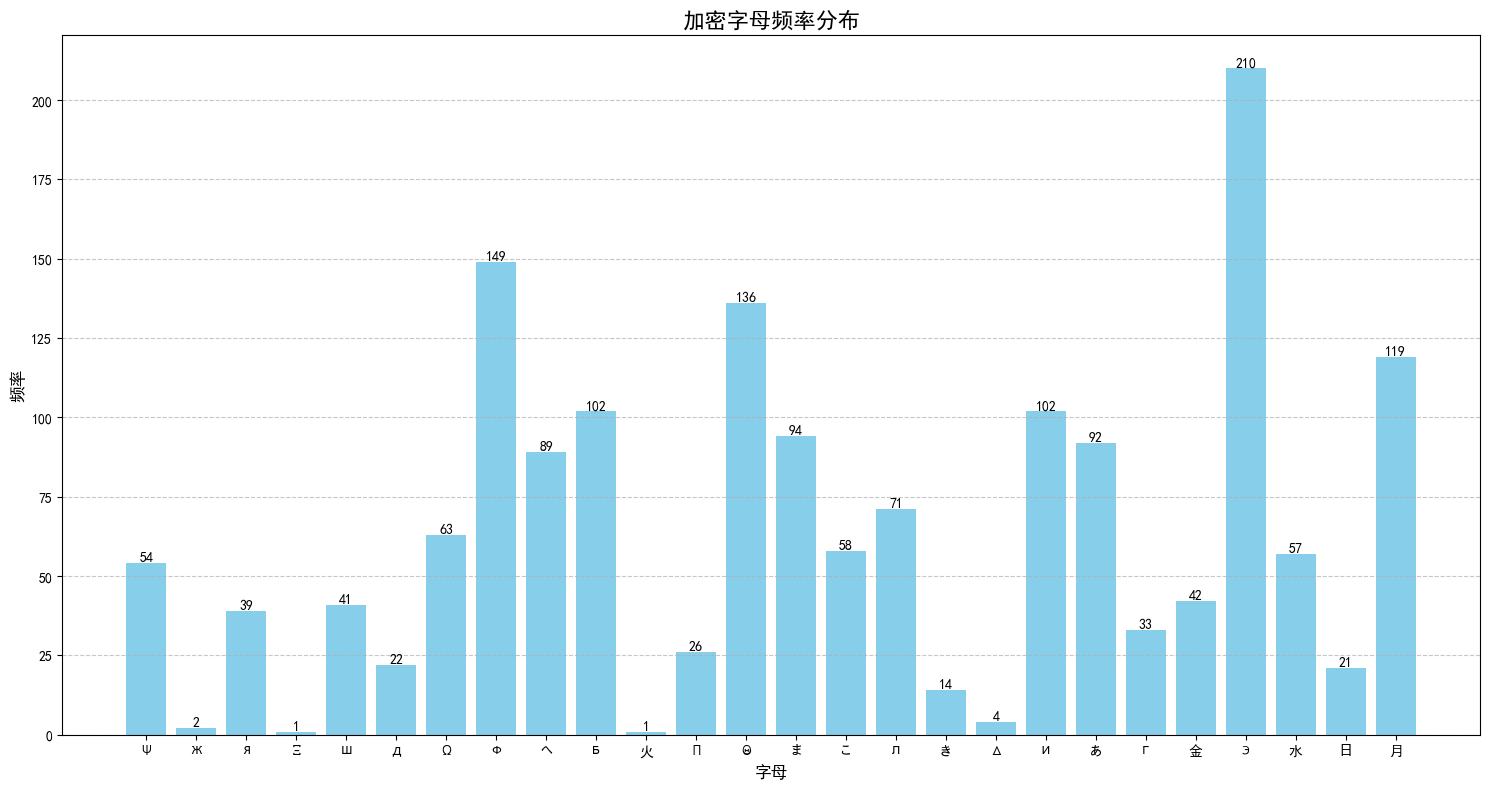

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

# 数据准备

frequencies = [letter_count.get(letter, 0) for letter in letters]

# 创建图表
plt.figure(figsize=(15, 8))

# 绘制柱状图
bars = plt.bar(letters, frequencies, color='skyblue')

# 设置标题和标签
plt.title('加密字母频率分布', fontsize=16)
plt.xlabel('字母', fontsize=12)
plt.ylabel('频率', fontsize=12)

# 为每个柱子添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# 添加网格线
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [114]:
def count_words_by_length(text, n):
    # 去除标点符号
    import re
    text = re.sub(r'[^\w\s]', '', text)
    
    # 按空格分割单词
    words = text.split()
    
    # 统计长度为n的单词
    n_letter_words = []
    for word in words:
        if len(word) == n:
            if word not in n_letter_words:
                n_letter_words.append(word)
            
    print(n_letter_words)
    return n_letter_words

for i in range(1,4):
    count_words_by_length(encrypted, i)


['И', '月']
['こΨ', '月へ', 'ФΘ', '水Θ', 'Θ金', 'こЭ', 'Иま', 'ШЭ', 'Θま', 'ΘБ', '月Ф', 'И金', '日Э', 'Πへ']
['へИФ', 'ФあЭ', 'へきΨ', 'ΨΘΩ', '月ま水', '水月Ψ', 'こЭФ', 'ΘЛ水', 'あ月へ', 'あΘШ', '金ΘБ', '水И水', 'ΘΩБ', 'Ш月Ψ', 'Я月ま', 'ИЛЛ', 'БЭ水', 'ΘまЭ', 'ΘΩФ']


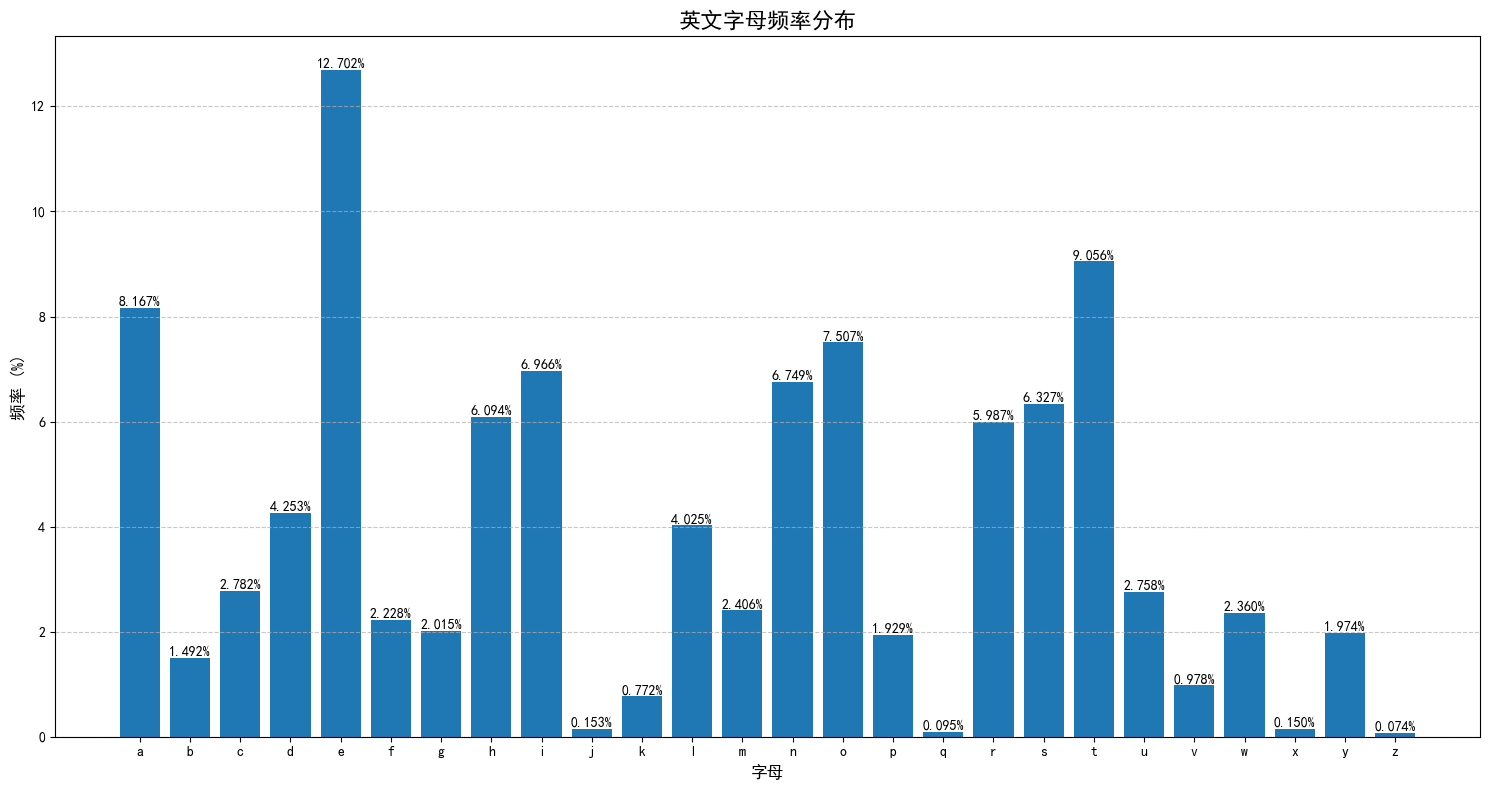

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

# 数据准备
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
          'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

frequencies = [8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 
              0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 
              6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074]

# 创建图表
plt.figure(figsize=(15, 8))

# 绘制柱状图
bars = plt.bar(letters, frequencies)

# 设置标题和标签
plt.title('英文字母频率分布', fontsize=16)
plt.xlabel('字母', fontsize=12)
plt.ylabel('频率 (%)', fontsize=12)

# 为每个柱子添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}%',
             ha='center', va='bottom')

# 添加网格线
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [117]:
text = '''
Dear Elizabeth,

I write this letter with sincere concern for your future. Your recent academic performance has been declining, and I know this isn't the brilliant student I met in the library last autumn. You have such extraordinary potential - you were our grade's top student and national essay competition winner.

I care about you deeply, which is why I must be honest: we should focus on our studies right now. The university entrance exams are approaching, and this time is crucial for both our futures. Let's make a promise: after we both get into excellent universities, we can reconsider our relationship.

You are too precious to let momentary feelings jeopardize your bright future.

With sincere concern,
William

P.S. - Study hard and get into your dream university.

'''

encrypted = cipher.encrypt(text)
print(encrypted) 




水Э月Б ЭЛИЖ月日ЭФあ,

И ШБИФЭ ФあИへ ЛЭФФЭБ ШИФあ へИまЯЭБЭ ЯΘまЯЭБま 金ΘБ ΨΘΩБ 金ΩФΩБЭ. ΨΘΩБ БЭЯЭまФ 月Я月水ЭこИЯ ΠЭБ金ΘБこ月まЯЭ あ月へ 日ЭЭま 水ЭЯЛИまИまГ, 月ま水 И きまΘШ ФあИへ Иへま'Ф ФあЭ 日БИЛЛИ月まФ へФΩ水ЭまФ И こЭФ Иま ФあЭ ЛИ日Б月БΨ Л月へФ 月ΩФΩこま. ΨΘΩ あ月ДЭ へΩЯあ ЭΞФБ月ΘБ水Иま月БΨ ΠΘФЭまФИ月Л - ΨΘΩ ШЭБЭ ΘΩБ ГБ月水Э'へ ФΘΠ へФΩ水ЭまФ 月ま水 ま月ФИΘま月Л Эへへ月Ψ ЯΘこΠЭФИФИΘま ШИままЭБ.

И Я月БЭ 月日ΘΩФ ΨΘΩ 水ЭЭΠЛΨ, ШあИЯあ Иへ ШあΨ И こΩへФ 日Э あΘまЭへФ: ШЭ へあΘΩЛ水 金ΘЯΩへ Θま ΘΩБ へФΩ水ИЭへ БИГあФ まΘШ. ФあЭ ΩまИДЭБへИФΨ ЭまФБ月まЯЭ ЭΞ月こへ 月БЭ 月ΠΠБΘ月ЯあИまГ, 月ま水 ФあИへ ФИこЭ Иへ ЯБΩЯИ月Л 金ΘБ 日ΘФあ ΘΩБ 金ΩФΩБЭへ. ЛЭФ'へ こ月きЭ 月 ΠБΘこИへЭ: 月金ФЭБ ШЭ 日ΘФあ ГЭФ ИまФΘ ЭΞЯЭЛЛЭまФ ΩまИДЭБへИФИЭへ, ШЭ Я月ま БЭЯΘまへИ水ЭБ ΘΩБ БЭЛ月ФИΘまへあИΠ.

ΨΘΩ 月БЭ ФΘΘ ΠБЭЯИΘΩへ ФΘ ЛЭФ こΘこЭまФ月БΨ 金ЭЭЛИまГへ ΔЭΘΠ月Б水ИЖЭ ΨΘΩБ 日БИГあФ 金ΩФΩБЭ.

ШИФあ へИまЯЭБЭ ЯΘまЯЭБま,
ШИЛЛИ月こ

Π.へ. - へФΩ水Ψ あ月Б水 月ま水 ГЭФ ИまФΘ ΨΘΩБ 水БЭ月こ ΩまИДЭБへИФΨ.




In [118]:
# 测试解密
decrypted = cipher.decrypt(encrypted)
print(decrypted)  


DEAR ELIZABETH,

I WRITE THIS LETTER WITH SINCERE CONCERN FOR YOUR FUTURE. YOUR RECENT ACADEMIC PERFORMANCE HAS BEEN DECLINING, AND I KNOW THIS ISN'T THE BRILLIANT STUDENT I MET IN THE LIBRARY LAST AUTUMN. YOU HAVE SUCH EXTRAORDINARY POTENTIAL - YOU WERE OUR GRADE'S TOP STUDENT AND NATIONAL ESSAY COMPETITION WINNER.

I CARE ABOUT YOU DEEPLY, WHICH IS WHY I MUST BE HONEST: WE SHOULD FOCUS ON OUR STUDIES RIGHT NOW. THE UNIVERSITY ENTRANCE EXAMS ARE APPROACHING, AND THIS TIME IS CRUCIAL FOR BOTH OUR FUTURES. LET'S MAKE A PROMISE: AFTER WE BOTH GET INTO EXCELLENT UNIVERSITIES, WE CAN RECONSIDER OUR RELATIONSHIP.

YOU ARE TOO PRECIOUS TO LET MOMENTARY FEELINGS JEOPARDIZE YOUR BRIGHT FUTURE.

WITH SINCERE CONCERN,
WILLIAM

P.S. - STUDY HARD AND GET INTO YOUR DREAM UNIVERSITY.


